In [1]:
from collections import Counter
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Separate 7 models and human data. 
# Assume Human text is from model 100,000 and machine text is from model 7 in domain 1
file_path_1 = 'data/domain1_train.json'
df1 = pd.read_json(file_path_1, lines=True)
df1.loc[df1['label'] == 1, 'model'] = 100000
df1.loc[df1['label'] == 0, 'model'] = 7

file_path_2 = 'data/domain2_train.json'
df2 = pd.read_json(file_path_2, lines=True)
df2['model'].fillna(100000, inplace=True)

df_comb = pd.concat([df1, df2],axis=0,ignore_index=True)

display(df_comb.groupby(df_comb['model']).count())

,text,label
model,,
0.0,2364,2364
1.0,2357,2357
2.0,2339,2339
3.0,2358,2358
4.0,789,789
5.0,780,780
6.0,1763,1763
7.0,9750,9750
100000.0,11900,11900


In [3]:
# Separate observations per model
m0 = df_comb.loc[df_comb['model']==0]
m1 = df_comb.loc[df_comb['model']==1]
m2 = df_comb.loc[df_comb['model']==2]
m3 = df_comb.loc[df_comb['model']==3]
m4 = df_comb.loc[df_comb['model']==4]
m5 = df_comb.loc[df_comb['model']==5]
m6 = df_comb.loc[df_comb['model']==6]
m7 = df_comb.loc[df_comb['model']==7]
mh = df_comb.loc[df_comb['model']==100000]

In [4]:
t0 = m0['text']
t1 = m1['text']
t2 = m2['text']
t3 = m3['text']
t4 = m4['text']
t5 = m5['text']
t6 = m6['text']
t7 = m7['text']
th = mh['text']


In [5]:
flattened_t0 = [element for sublist in t0 for element in sublist]
flattened_t1 = [element for sublist in t1 for element in sublist]
flattened_t2 = [element for sublist in t2 for element in sublist]
flattened_t3 = [element for sublist in t3 for element in sublist]
flattened_t4 = [element for sublist in t4 for element in sublist]
flattened_t5 = [element for sublist in t5 for element in sublist]
flattened_t6 = [element for sublist in t6 for element in sublist]
flattened_t7 = [element for sublist in t7 for element in sublist]
flattened_th = [element for sublist in th for element in sublist]

In [16]:
# Count the frequencies of each element in the list
word_frequencies_t0 = Counter(flattened_t0)
word_frequencies_t1 = Counter(flattened_t1)
word_frequencies_t2 = Counter(flattened_t2)
word_frequencies_t3 = Counter(flattened_t3)
word_frequencies_t4 = Counter(flattened_t4)
word_frequencies_t5 = Counter(flattened_t5)
word_frequencies_t6 = Counter(flattened_t6)
word_frequencies_t7 = Counter(flattened_t7)
word_frequencies_th = Counter(flattened_th)

# for element, frequency in element_frequencies.items():
#     print(f"Element {element} appears {frequency} times.")
word_frequencies_t0[1]

28591

28591

18608

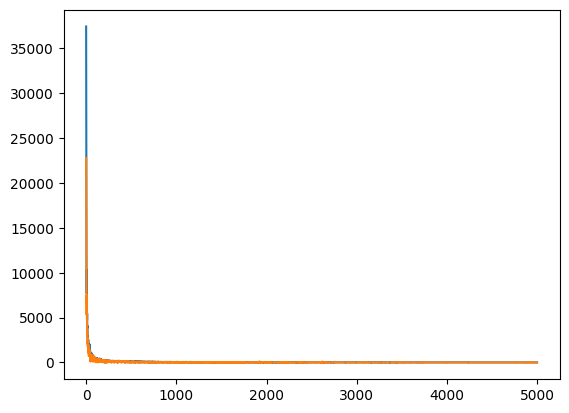

In [18]:
# Extract keys (categories) and values (counts) from the dictionary
word_frequencies_t0 = {k: word_frequencies_t0[k] for k in sorted(word_frequencies_t0)}
display(word_frequencies_t0[1])
words_0 = list(word_frequencies_t0.keys())
counts_0 = list(word_frequencies_t0.values())

word_frequencies_t1 = {k: word_frequencies_t1[k] for k in sorted(word_frequencies_t1)}
display(word_frequencies_t1[1])
words_1 = list(word_frequencies_t1.keys())
counts_1 = list(word_frequencies_t1.values())

# Create a bar chart
plt.plot(words_0, counts_0)
plt.plot(words_1, counts_1)
# Add labels and title
# plt.xlabel('Fruits')
# plt.ylabel('Counts')
# plt.title('Fruit Counts')

# Show the plot
plt.show()